# Arithmetic with Pulse Templates

Pulse templates support some simple arithmetic operations that make it nearly a vector space. It is implemented via
the two classes `ArithmeticPulseTemplate` and `ArithmeticAtomicPulseTemplate`. This notebook demonstrates the direct
and indirect (via invoking operators) usage of these two pulse template classes. We start by defining some building
blocks.

H:\Users\humpohl\Documents\git\qc-toolkit\qupulse\pulses\plotting.py:336: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  axes.get_figure().show()


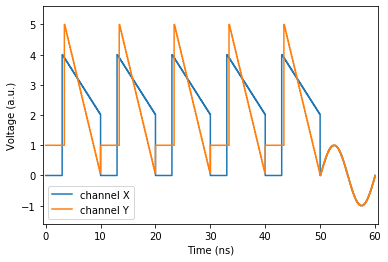

In [1]:
import math
from qupulse.pulses import TablePT, FunctionPT, RepetitionPT, AtomicMultiChannelPT, plotting

# define some building blocks
sin_pt = FunctionPT('sin(omega*t)', 't_duration', channel='X')
cos_pt = FunctionPT('sin(omega*t)', 't_duration', channel='Y')
exp_pt = AtomicMultiChannelPT(sin_pt, cos_pt)
tpt = TablePT({'X': [(0, 0), (3., 4.), ('t_duration', 2., 'linear')],
               'Y': [(0, 1.), ('t_y', 5.), ('t_duration', 0., 'linear')]})

complex_pt = RepetitionPT(tpt, 5) @ exp_pt

parameters = dict(t_duration=10, omega=math.pi*2/10, t_y=3.4)
_ = plotting.plot(complex_pt, parameters)

### Operations with pulse templates and scalars
Operations between a pulse template and a scalar are implemented via `ArithmeticAtomicPulseTemplate`.

#### Scale
Given an arbitrary pulse template $P$ and a scalar $\alpha$ we can scale the amplitude of all channels by multiplying
$P$ with $\alpha$. Multiplying with $\alpha^{-1}$ (some people call it dividing by $\alpha$) is also implemented. 

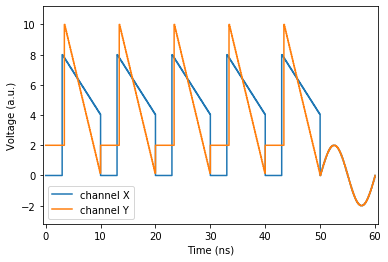

In [2]:
from qupulse.expressions import Expression

scaled = 'alpha' * complex_pt

# casts alpha implicitly to ExpressionScalar
multiplied = complex_pt * 'x + y'
divided = complex_pt / 4.4

_ = plotting.plot(scaled, {**parameters, 'alpha': 2})

#### Offset

In [3]:
offset_pt = scaled + 'offset * alpha'

diff_pt = 4 - complex_pt

#### Channel specific operands
If you only want to apply an operation to a specific subset of a pulse template's channels you can do this by using a
dictionary as the other operand. Channels not in the dictionary are treated as if the dictionary contains the neutral
element of the operation i.e. 0 for addition and subtraction and 1 for multiplication and division.

In [4]:
scaled_x = {'X': 'x_scale'} * complex_pt
scaled_x_y = {'X': 'x_scale', 'Y': 2} * complex_pt

offset_x = complex_pt + {'X': 2}


### Adding and subtracting pulse templates
Addition and subtraction of pulse templates returns an atomic pulse template, the `ArithmeticAtomicPulseTemplate`
 - Both have the same length
 - Both are atomic. Otherwise they are interpreted as atomic.
 - Channels defined in only one of the two operands are implicitly defined as 0 in the other

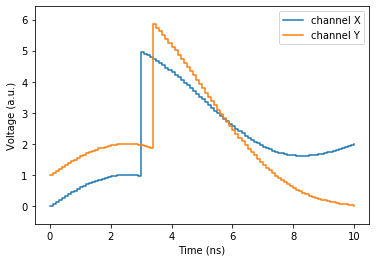

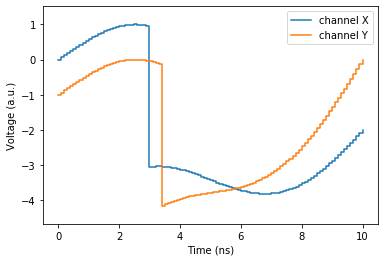

In [5]:
_ = plotting.plot(exp_pt + tpt, parameters)
_ = plotting.plot(exp_pt - tpt, parameters)

combined = exp_pt + tpt

### Manual creation
For exact control what is needed we can use the classes directly instead of implicitly via the operators

In [6]:
from qupulse.pulses import ArithmeticPT, ArithmeticAtomicPT

scaled_x = ArithmeticPT({'X': 'x_scale'}, '*', complex_pt, identifier='scaled_x')

# this raises a warning because complex_pt is treated as atomic
complex_added_1 = ArithmeticAtomicPT(complex_pt, '+', complex_pt)

# this raises a warning because complex_pt is treated as atomic
complex_added_2 = ArithmeticAtomicPT(complex_pt, '+', complex_pt, silent_atomic=True)

H:\Users\humpohl\Documents\git\qc-toolkit\qupulse\pulses\arithmetic_pulse_template.py:60: ImplicitAtomicityInArithmeticPT: ArithmeticAtomicPulseTemplate treats all operands as if they are atomic. You can silence this warning by passing `silent_atomic=True` or by ignoring this category.
  category=ImplicitAtomicityInArithmeticPT)
